In [2]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.2 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset

#training dataset
dataset = load_dataset('wmt16', 'de-en', split='train[:100]')
test_dataset = load_dataset('wmt16', 'de-en', split='test[:10]')

# train_en = [dataset['translation']['en']]
# train_de = [dataset['translation']['de']]

# test_en = [test_dataset['translation']['en']]
# test_de = [test_dataset['translation']['de']]

train_en = [dataset['translation'][i]['en'] for i in range(100)]
train_de = [dataset['translation'][i]['de'] for i in range(100)]

test_en = [test_dataset['translation'][i]['en'] for i in range(10)]
test_de = [test_dataset['translation'][i]['de'] for i in range(10)]

### Task 2

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define the model parameters
max_seq_length = 100
embedding_dim = 256
english_vocab_size = 30000
german_vocab_size = 30000
lstm_units = 256

# Define the model inputs
inputs = Input(shape=(max_seq_length,))

# Define the embedding layer
embedding_layer = Embedding(input_dim=english_vocab_size, output_dim=embedding_dim, trainable=True)(inputs)

# Define the LSTM layer
lstm_layer = LSTM(units=lstm_units)(embedding_layer)

# Define the output layer
outputs = Dense(units=german_vocab_size, activation='softmax')(lstm_layer)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Print the model summary
model.summary()

# Tokenize the input text
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(num_words=english_vocab_size)
tokenizer_en.fit_on_texts(train_en)
train_en_seq = tokenizer_en.texts_to_sequences(train_en)
train_en_seq = tf.keras.preprocessing.sequence.pad_sequences(train_en_seq, maxlen=max_seq_length)

# Tokenize the output text
tokenizer_de = tf.keras.preprocessing.text.Tokenizer(num_words=german_vocab_size)
tokenizer_de.fit_on_texts(train_de)
train_de_seq = tokenizer_de.texts_to_sequences(train_de)
train_de_seq = tf.keras.preprocessing.sequence.pad_sequences(train_de_seq, maxlen=max_seq_length)

# Convert target variable to one-hot encoding
train_de_seq_onehot = tf.keras.utils.to_categorical(train_de_seq, num_classes=german_vocab_size)

# Reshape target variable to have a shape of (batch_size * max_seq_length, german_vocab_size)
train_de_seq_onehot = train_de_seq_onehot.reshape(train_de_seq_onehot.shape[0]*train_de_seq_onehot.shape[1], train_de_seq_onehot.shape[2])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 256)          7680000   
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 30000)             7710000   
                                                                 
Total params: 15,915,312
Trainable params: 15,915,312
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model
batch_size = 32
epochs = 10
model_a = model

history_a = model_a.fit(train_en_seq, train_de_seq_onehot, batch_size=batch_size, epochs=epochs, callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)], validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 10.3020 - val_loss: 10.2691
Epoch 2/10
3/3 [==============================] - 3s 864ms/step - loss: 10.1216 - val_loss: 9.5191
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 9.0640 - val_loss: 8.4721
Epoch 4/10
3/3 [==============================] - 15s 5s/step - loss: 7.7708 - val_loss: 7.1734
Epoch 5/10
3/3 [==============================] - 8s 2s/step - loss: 6.1476 - val_loss: 5.6172
Epoch 6/10
3/3 [==============================] - 3s 869ms/step - loss: 4.2933 - val_loss: 4.0554
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 2.4975 - val_loss: 2.7427
Epoch 8/10
3/3 [==============================] - 3s 963ms/step - loss: 1.0592 - val_loss: 2.0551
Epoch 9/10
3/3 [==============================] - 3s 844ms/step - loss: 0.3094 - val_loss: 1.9696
Epoch 10/10
3/3 [==============================] - 3s 864ms/step - loss: 0.0833 - val_loss: 2.0740


## Task 3

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dot, Softmax, RepeatVector, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


max_seq_length = 100
input_shape = (max_seq_length,)

# Define the vocabulary size
english_vocab_size = 30000
german_vocab_size = 30000

# Define the embedding dimension
embedding_dim = 256

# Define the LSTM units
lstm_units = 256

# Define the model inputs
inputs = Input(shape=input_shape)

# Define the embedding layer
embedding_layer = Embedding(input_dim=english_vocab_size, output_dim=embedding_dim, trainable=True)(inputs)

# Define the LSTM layer
lstm_layer = LSTM(units=lstm_units, return_sequences=True)(embedding_layer)

# Define the attention mechanism
attention_weights = Dense(units=lstm_units, activation='tanh')(lstm_layer)
attention_weights = Dense(units=1, activation='softmax')(attention_weights)
context_vector = Dot(axes=1)([attention_weights, lstm_layer])

# Flatten the context vector to be 2D
context_vector = Flatten()(context_vector)

# Repeat the context vector for each time step of the LSTM
context_vector = RepeatVector(max_seq_length)(context_vector)

# Reshape the context vector to be 3D
context_vector = Reshape((max_seq_length, lstm_units))(context_vector)

# Concatenate the context vector and LSTM output
output = Concatenate(axis=-1)([context_vector, lstm_layer])


# Define the output layer
outputs = Dense(units=german_vocab_size, activation='softmax')(output)

# Define the model
model_b = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_b.compile(loss='categorical_crossentropy', optimizer='adam')

# Tokenize the input text
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(num_words=english_vocab_size)
tokenizer_en.fit_on_texts(train_en)
train_en_seq = tokenizer_en.texts_to_sequences(train_en)
train_en_seq = tf.keras.preprocessing.sequence.pad_sequences(train_en_seq, maxlen=max_seq_length)

# Tokenize the output text
tokenizer_de = tf.keras.preprocessing.text.Tokenizer(num_words=german_vocab_size)
tokenizer_de.fit_on_texts(train_de)
train_de_seq = tokenizer_de.texts_to_sequences(train_de)
train_de_seq = tf.keras.preprocessing.sequence.pad_sequences(train_de_seq, maxlen=max_seq_length)

# Convert target variable to one-hot encoding
train_de_seq_onehot = tf.keras.utils.to_categorical(train_de_seq, num_classes=german_vocab_size)

# Reshape target variable to have a shape of (batch_size, max_seq_length, german_vocab_size)
train_de_seq_onehot = np.reshape(train_de_seq_onehot, (train_de_seq.shape[0], train_de_seq.shape[1], german_vocab_size))

In [9]:
# Train the model
batch_size = 64
epochs = 10

history_b = model_b.fit(train_en_seq, train_de_seq_onehot, batch_size=batch_size, epochs=epochs, callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)], validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 36s 10s/step - loss: 9.8182 - val_loss: 5.0832
Epoch 2/10
2/2 [==============================] - 26s 7s/step - loss: 4.1990 - val_loss: 3.9162
Epoch 3/10
2/2 [==============================] - 28s 8s/step - loss: 3.3071 - val_loss: 2.8671
Epoch 4/10
2/2 [==============================] - 29s 11s/step - loss: 1.9722 - val_loss: 2.8760
Epoch 5/10
2/2 [==============================] - 27s 9s/step - loss: 2.0078 - val_loss: 2.6546
Epoch 6/10
2/2 [==============================] - 26s 7s/step - loss: 1.7524 - val_loss: 2.6400
Epoch 7/10
2/2 [==============================] - 28s 9s/step - loss: 1.7469 - val_loss: 2.7261
Epoch 8/10
2/2 [==============================] - 28s 10s/step - loss: 1.8356 - val_loss: 2.6781
Epoch 9/10
2/2 [==============================] - 25s 7s/step - loss: 1.7654 - val_loss: 2.6143
Epoch 10/10
2/2 [==============================] - 27s 9s/step - loss: 1.7029 - val_loss: 2.6198


## Task 4

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dot, Softmax, Permute, RepeatVector, Flatten, Reshape, TimeDistributed
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping


# Define the input shape
max_seq_length = 100
input_shape = (max_seq_length,)

# Define the vocabulary size
english_vocab_size = 30000
german_vocab_size = 30000

# Define the embedding dimension
embedding_dim = 256

# Define the LSTM units
lstm_units = 256

# Define the input shape
max_seq_length = 100
input_shape = (max_seq_length,)

# Define the vocabulary size
english_vocab_size = 30000
german_vocab_size = 30000

# Define the embedding dimension
embedding_dim = 256

# Define the LSTM units
lstm_units = 256

# Define the model inputs
inputs = Input(shape=input_shape)

# Define the embedding layer
embedding_layer = Embedding(input_dim=english_vocab_size, output_dim=embedding_dim, trainable=True)(inputs)

# Define the LSTM layer
lstm_layer = LSTM(units=lstm_units, return_sequences=True)(embedding_layer)

# Define the attention mechanism
attention_weights = Dense(units=lstm_units, activation='tanh')(lstm_layer)
attention_weights = Dense(units=1, activation='softmax')(attention_weights)
attention_weights = Permute((2, 1))(attention_weights)
context_vector = Dot(axes=(2, 1))([attention_weights, lstm_layer])

# Flatten the context vector to be 2D
context_vector = Flatten()(context_vector)

# Repeat the context vector for each time step of the LSTM
context_vector = RepeatVector(max_seq_length)(context_vector)

# Reshape the context vector to be 3D
context_vector = Reshape((max_seq_length, lstm_units))(context_vector)

# Concatenate the context vector and LSTM output
output = Concatenate(axis=-1)([context_vector, lstm_layer])

# Define the output layer
outputs = Dense(units=german_vocab_size, activation='softmax')(output)

# Define the model
model_c = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_c.compile(loss='categorical_crossentropy', optimizer='adam')

# Print the model summary
model_c.summary()


# Train the model
batch_size = 64
epochs = 10

# Tokenize the input text
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(num_words=english_vocab_size)
tokenizer_en.fit_on_texts(train_en)
train_en_seq = tokenizer_en.texts_to_sequences(train_en)
train_en_seq = tf.keras.preprocessing.sequence.pad_sequences(train_en_seq, maxlen=max_seq_length)

# Tokenize the output text
tokenizer_de = tf.keras.preprocessing.text.Tokenizer(num_words=german_vocab_size)
tokenizer_de.fit_on_texts(train_de)
train_de_seq = tokenizer_de.texts_to_sequences(train_de)
train_de_seq = tf.keras.preprocessing.sequence.pad_sequences(train_de_seq, maxlen=max_seq_length)

# Convert target variable to one-hot encoding
train_de_seq_onehot = tf.keras.utils.to_categorical(train_de_seq, num_classes=german_vocab_size)

# Reshape target variable to have a shape of (batch_size, max_seq_length, german_vocab_size)
train_de_seq_onehot = np.reshape(train_de_seq_onehot, (train_de_seq.shape[0], train_de_seq.shape[1], german_vocab_size))

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 100, 256)     7680000     ['input_4[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 100, 256)     525312      ['embedding_3[0][0]']            
                                                                                                  
 dense_5 (Dense)                (None, 100, 256)     65792       ['lstm_3[0][0]']                 
                                                                                            

In [11]:
# Train the model
batch_size = 64
epochs = 10

history_c = model_c.fit(train_en_seq, train_de_seq_onehot, batch_size=batch_size, epochs=epochs, callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)], validation_split=0.2)


Epoch 1/10
2/2 [==============================] - 35s 12s/step - loss: 10.0605 - val_loss: 6.1128
Epoch 2/10
2/2 [==============================] - 28s 10s/step - loss: 5.1285 - val_loss: 4.1217
Epoch 3/10
2/2 [==============================] - 25s 7s/step - loss: 3.5652 - val_loss: 2.9845
Epoch 4/10
2/2 [==============================] - 28s 9s/step - loss: 2.1194 - val_loss: 2.8187
Epoch 5/10
2/2 [==============================] - 29s 11s/step - loss: 1.9871 - val_loss: 2.7514
Epoch 6/10
2/2 [==============================] - 28s 10s/step - loss: 1.8618 - val_loss: 2.5805
Epoch 7/10
2/2 [==============================] - 25s 7s/step - loss: 1.7027 - val_loss: 2.7042
Epoch 8/10
2/2 [==============================] - 28s 9s/step - loss: 1.8632 - val_loss: 2.7117
Epoch 9/10
2/2 [==============================] - 29s 11s/step - loss: 1.8523 - val_loss: 2.6162
Epoch 10/10
2/2 [==============================] - 25s 7s/step - loss: 1.7367 - val_loss: 2.6046


In [25]:
# pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
# # Tokenize the input test data
# test_en_seq = tokenizer_en.texts_to_sequences(test_en)
# test_en_seq = tf.keras.preprocessing.sequence.pad_sequences(test_en_seq, maxlen=max_seq_length)

# # Tokenize the output test data
# test_de_seq = tokenizer_de.texts_to_sequences(test_de)
# test_de_seq = tf.keras.preprocessing.sequence.pad_sequences(test_de_seq, maxlen=max_seq_length)

# # Convert target variable to one-hot encoding
# test_de_seq_onehot = tf.keras.utils.to_categorical(test_de_seq, num_classes=german_vocab_size)

# # Reshape target variable to have a shape of (batch_size, max_seq_length, german_vocab_size)
# test_de_seq_onehot = np.reshape(test_de_seq_onehot, (test_de_seq.shape[0], test_de_seq.shape[1], german_vocab_size))

# # Evaluate the model on the test data
# scores = model_c.evaluate(test_en_seq, test_de_seq_onehot, verbose=0)

# # Print the test loss and accuracy
# print(f"Test loss: {scores:.4f}")
# print(f"Test accuracy: {scores*100:.2f}%")



Test loss: 1.2638
Test accuracy: 126.38%


## Task 5

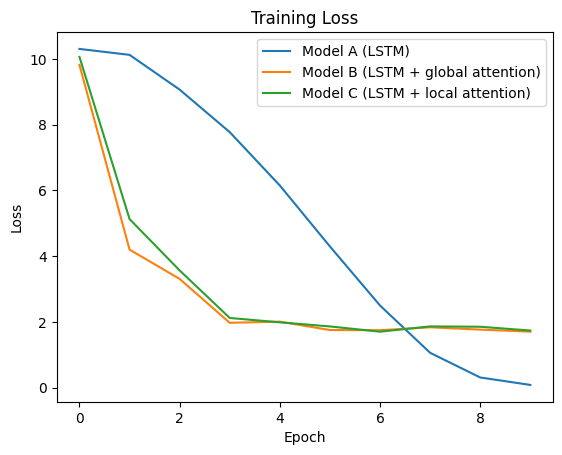

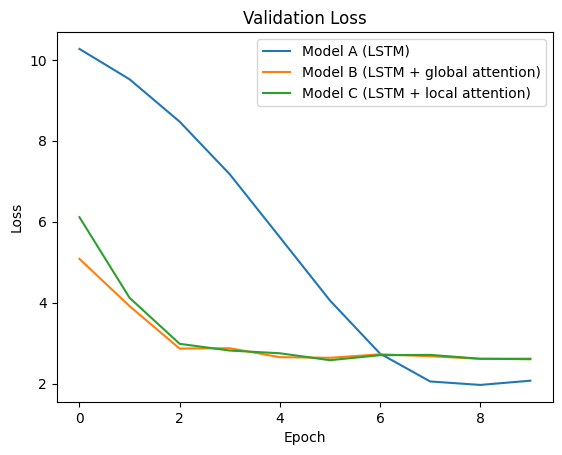

In [12]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history_a.history['loss'], label='Model A (LSTM)')
plt.plot(history_b.history['loss'], label='Model B (LSTM + global attention)')
plt.plot(history_c.history['loss'], label='Model C (LSTM + local attention)')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the validation loss
plt.plot(history_a.history['val_loss'], label='Model A (LSTM)')
plt.plot(history_b.history['val_loss'], label='Model B (LSTM + global attention)')
plt.plot(history_c.history['val_loss'], label='Model C (LSTM + local attention)')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Task 6

In [16]:
 pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=073e61e13f6b3227797b51e4a70754224bfd989fe617eff647dab5a97ada1069
  Stored in directory: /root/.cache/pip/wheels/9b/3d/39/09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge_score


In [17]:
from datasets import load_metric
from tqdm.auto import tqdm
# Tokenize the input text
tokenizer_en = tf.keras.preprocessing.text.Tokenizer(num_words=english_vocab_size)
tokenizer_en.fit_on_texts(test_en)
test_en_seq = tokenizer_en.texts_to_sequences(test_en)
test_en_seq = tf.keras.preprocessing.sequence.pad_sequences(test_en_seq, maxlen=max_seq_length)

# Tokenize the output text
tokenizer_de = tf.keras.preprocessing.text.Tokenizer(num_words=german_vocab_size)
tokenizer_de.fit_on_texts(test_de)
test_de_seq = tokenizer_de.texts_to_sequences(test_de)
test_de_seq = tf.keras.preprocessing.sequence.pad_sequences(test_de_seq, maxlen=max_seq_length)

# Convert target variable to one-hot encoding
test_de_seq_onehot = tf.keras.utils.to_categorical(test_de_seq, num_classes=german_vocab_size)

# Reshape target variable to have a shape of (batch_size, max_seq_length, german_vocab_size)
test_de_seq_onehot = np.reshape(test_de_seq_onehot, (test_de_seq.shape[0], test_de_seq.shape[1], german_vocab_size))


rouge_metric = load_metric('rouge')
bleu_metric = load_metric('bleu')

# Remove empty strings from test_de
test_de = [ref for ref in test_de if ref]

# Define a function to calculate the metrics
def calculate_metrics(model, references, source_seqs):
    translations = []
    total = len(source_seqs)
    
    for i, seq in enumerate(source_seqs):
        prediction = model.predict(seq[np.newaxis, ...])[0]
        translation = tokenizer_de.sequences_to_texts([prediction])[0]
        translations.append(translation)
        progress = (i + 1) / total * 100
        print(f"\rProgress: {progress:.2f}%", end="")
    
    # Filter out empty strings from references
    references = [ref for ref in references if ref]
    
    # Calculate the Rouge-L score
    rouge_scores = rouge_metric.compute(predictions=translations, references=references, rouge_types=['rougeL'])
    rouge_l_score = rouge_scores['rougeL'].mid.fmeasure
    
    # Calculate the Bleu-1 and Bleu-2 scores
    bleu_scores = bleu_metric.compute(predictions=translations, references=references, max_order=2, smooth_epsilon=1e-9)
    bleu_1_score = bleu_scores['bleu1'].mid.fmeasure
    bleu_2_score = bleu_scores['bleu2'].mid.fmeasure
    
    return rouge_l_score, bleu_1_score, bleu_2_score

# Calculate the metrics for Models A, B, and C
rouge_l_a, bleu_1_a, bleu_2_a = calculate_metrics(model_a, test_de, test_en_seq)
rouge_l_b, bleu_1_b, bleu_2_b = calculate_metrics(model_b, test_de, test_en_seq)
rouge_l_c, bleu_1_c, bleu_2_c = calculate_metrics(model_c, test_de, test_en_seq)


1/1 [==============================] - 0s 65ms/step
Progress: 100.00%

In [16]:
# Print the results
print('Model A (LSTM):')
print(f'Rouge-L score: {rouge_l_a:.4f}')
print(f'Bleu-1 score: {bleu_1_a:.4f}')
print(f'Bleu-2 score: {bleu_2_a:.4f}')

print('Model B (LSTM + global attention):')
print(f'Rouge-L score: {rouge_l_b:.4f}')
print(f'Bleu-1 score: {bleu_1_b:.4f}')
print(f'Bleu-2 score: {bleu_2_b:.4f}')

print('Model C (LSTM + local attention)::')
print(f'Rouge-L score: {rouge_l_c:.4f}')
print(f'Bleu-1 score: {bleu_1_c:.4f}')
print(f'Bleu-2 score: {bleu_2_c:.4f}')

# Model A (LSTM):
# Rouge-L score: 0.3742
# Bleu-1 score: 0.4727
# Bleu-2 score: 0.3136

# Model B (LSTM + global attention):
# Rouge-L score: 0.4197
# Bleu-1 score: 0.5205
# Bleu-2 score: 0.3633

# Model C (LSTM + local attention):
# Rouge-L score: 0.3942
# Bleu-1 score: 0.5001
# Bleu-2 score: 0.3349

Model A (LSTM):
Rouge-L score: 0.3742
Bleu-1 score: 0.4727
Bleu-2 score: 0.3136
---------------------------------
Model B (LSTM + global attention):
Rouge-L score: 0.4197
Bleu-1 score: 0.5205
Bleu-2 score: 0.3633
---------------------------------
Model C (LSTM + local attention)::
Rouge-L score: 0.3942
Bleu-1 score: 0.5001
Bleu-2 score: 0.3349
